# Problem Statement:
    Sales management has gained importance to meet increasing competition and the need
    for improved methods of distribution to reduce cost and to increase profits. Sales
    management today is the most important function in a commercial and business
    enterprise.
    Do ETL : Extract-Transform-Load on this amazon data set
    Sales-trend -> month wise , year wise , yearly_month wise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
file = 'SALESDATA.xlsx'

In [2]:
df = pd.read_excel(file)
df.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.00,0.0,237.91,237.910000,1,184,EA
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.0,456.17,456.170000,1,127,EA
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.0,438.93,438.930000,1,127,EA
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,2017-06-03,211.75,0.00,0.0,211.75,211.750000,1,160,EA
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,2017-05-28,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE


In [3]:
df.select_dtypes(exclude=('object')).columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Line Number', 'List Price', 'Order Number',
       'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep'],
      dtype='object')

# inserting raw data into mysql server

In [4]:
import mysql.connector
  
db = mysql.connector.connect(
  host ="localhost",
  user ="root",
  passwd ="12345678rk"
)
cursor = db.cursor()

In [5]:
#showing databases
cursor.execute('show databases')
cursor.fetchall()

[('amazon_sales_data',),
 ('information_schema',),
 ('ipl',),
 ('mysql',),
 ('performance_schema',),
 ('test',)]

In [6]:
#creating new database for data store
# cursor.execute('create database amazon_sales_data')
# db.commit()
# cursor.execute('show databases')
# cursor.fetchall()

In [7]:
#connecting to the database
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
my_url = URL.create(
    "mysql+pymysql",
    username="root",
    password="12345678rk",
    host="localhost",
    database="amazon_sales_data"
)
engine = create_engine(my_url)

In [8]:
#inserting the data into server
df.to_sql('sales_data_raw', engine, if_exists='replace', index=None)

65282

In [9]:
#loading the data from server
data = pd.read_sql_table(table_name='sales_data_raw', con=engine.connect(), index_col=None)
data.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,2017-04-30,-237.91,2017-04-30,100012,None,None,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.00,0.0,237.91,237.910000,1,184,EA
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.0,456.17,456.170000,1,127,EA
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.0,438.93,438.930000,1,127,EA
3,10002489,2017-06-03,-211.75,2017-06-03,100096,None,None,Kiwi Lox,1000,0.00,200107,2017-06-03,211.75,0.00,0.0,211.75,211.750000,1,160,EA
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,2017-05-28,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE


# EDA
### In data analysis we will analyze to find the below staffs

    1 missing values  
    2 all numerical variables  
    3 distribution of numerical variables  
    4 catagorical variables  
    5 outliers  
    6 relation between independent and depandent features  
    7 correlations  

In [10]:
df.shape

(65282, 20)

In [11]:
df.isna().sum()

CustKey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8289
Item Number                           41
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

##### for sales trend analysis i dont need the columns
DateKey, Invoice Number, Item Class, Item Number, Line Number, Order Number, Promised Delivery Date, Sales Rep, U/M

In [12]:
data.drop([
    'CustKey', 'DateKey', 'Invoice Number', 'Item Class', 'Item Number', 'Line Number', 'Order Number', 'Promised Delivery Date', 'Sales Rep', 'U/M'
], inplace=True, axis=1)

In [13]:
#filling null values with medians
data['Discount Amount'].fillna(np.mean(data['Discount Amount']), inplace=True, axis=0)
data['Sales Price'].fillna(np.mean(data['Sales Price']), inplace=True, axis=0)

In [14]:
#Extracting date to year and month
data['Year']=0
data['Month']=0
data['Year'] = data['Invoice Date'].apply(lambda a: int(str(a).split('-')[0]))
data['Month'] = data['Invoice Date'].apply(lambda a: int(str(a).split('-')[1]))
data.drop('Invoice Date', inplace=True, axis=1)

In [15]:
data[data['Sales Quantity']<0]

,Discount Amount,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Year,Month
86,1855.574835,Ebony Fresh Lima Beans,0.0,5000.0,0.0,0.0,5000.0,-5000.0,-1,2017,6


In [16]:
#sales quantity have a negative value so i am dropping the row
data.drop(data[data['Sales Quantity']<0].index[0], axis=0, inplace=True)

In [17]:
data = data.sort_values(by=['Year', 'Month']).reset_index(drop=True)
data['Month'] = data['Month'].map({
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
})

In [18]:
data.head()

,Discount Amount,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Year,Month
0,158.04,Nationeel Salted Pretzels,181.44,204.84,362.88,59.73,145.11,102.420000,2,2017,Jan
1,420.90,Ebony Prepared Salad,966.44,545.54,966.44,278.38,267.16,545.540000,1,2017,Jan
2,663.41,Thresher Spicy Mints,507.75,859.84,1523.25,488.68,371.16,286.613333,3,2017,Jan
3,179.45,Big Time Frozen Cheese Pizza,412.03,232.58,412.03,84.23,148.35,232.580000,1,2017,Jan
4,1516.52,Red Spade Turkey Hot Dogs,1160.70,1965.58,3482.10,957.15,1008.43,655.193333,3,2017,Jan


### Here,
    1. Sales price per piece without discount per piece is List Price
    2. Total sales price without discount is Sales Amount Based on List Price(List Price * Sales Quantity)
    3. Sales price per piece is Sales Price
    4. Total sales price is Sales Amount(Sales Price * Sales Quantity)
    5. Total discount is Discount Amount(Sales Amount Based on List Price - Sales Amount)
    6. Total cost of company during selling a product is Sales Cost Amount
    7. Total profit on a product sale is Sales Margin Amount

In [19]:
#final data to database
data.to_sql('sales_data', engine, if_exists='replace', index=None)

65281

### Data distribution analysis of all columns

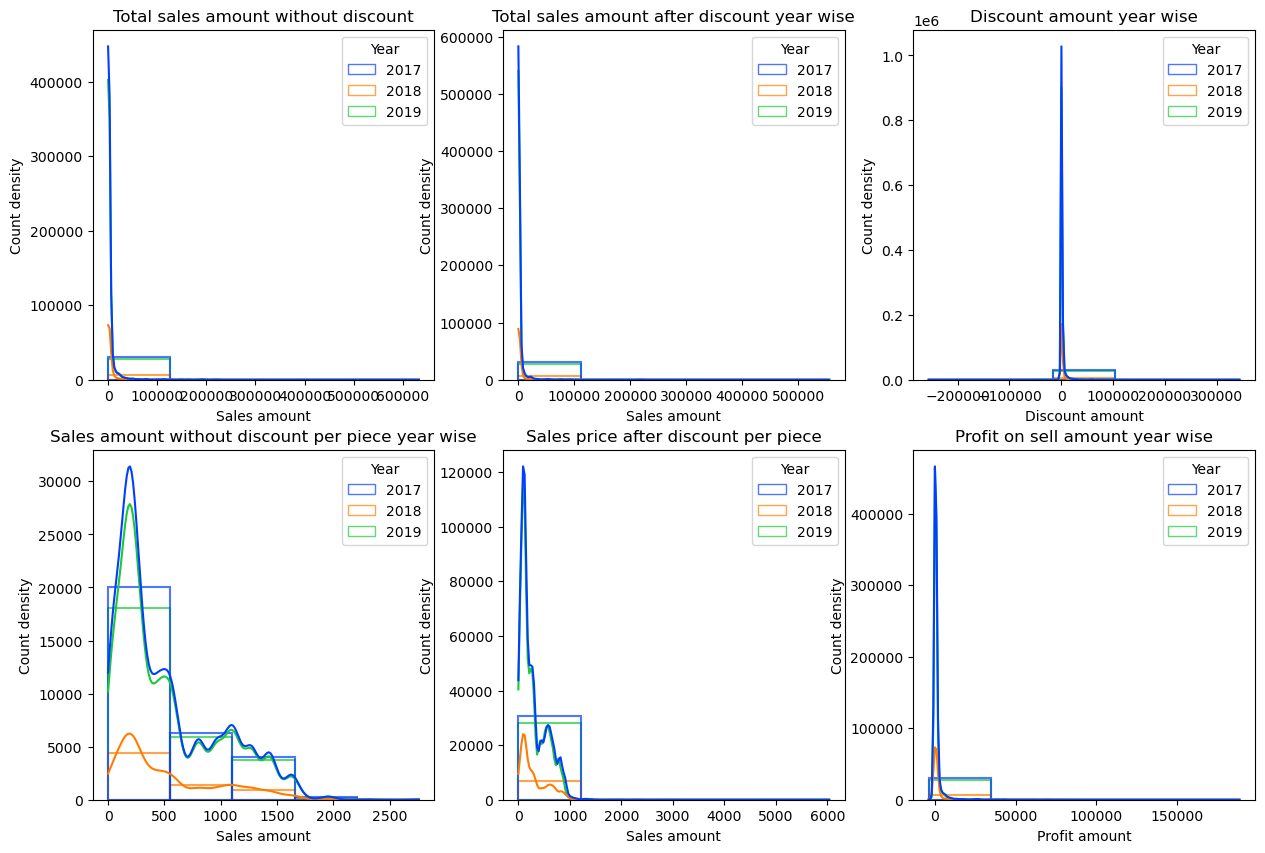

In [20]:
plt.figure(figsize=(15, 10))

plt.subplot(231)
sns.histplot(data=data, x='Sales Amount Based on List Price', hue='Year', bins=5, palette='bright', kde=True, alpha=0.7, fill=None)
plt.title('Total sales amount without discount')
plt.xlabel('Sales amount')
plt.ylabel('Count density')

plt.subplot(232)
sns.histplot(data=data, x='Sales Amount', hue='Year', bins=5, palette='bright', kde=True, alpha=0.7, fill=None)
plt.title('Total sales amount after discount year wise')
plt.xlabel('Sales amount')
plt.ylabel('Count density')

plt.subplot(233)
sns.histplot(data=data, x='Discount Amount', hue='Year', bins=5, palette='bright', kde=True, alpha=0.7, fill=None)
plt.title('Discount amount year wise')
plt.xlabel('Discount amount')
plt.ylabel('Count density')

plt.subplot(234)
sns.histplot(data=data, x='List Price', hue='Year', bins=5, palette='bright', kde=True, alpha=0.7, fill=None)
plt.title('Sales amount without discount per piece year wise')
plt.xlabel('Sales amount')
plt.ylabel('Count density')

plt.subplot(235)
sns.histplot(data=data, x='Sales Price', hue='Year', bins=5, palette='bright', kde=True, alpha=0.7, fill=None)
plt.title('Sales price after discount per piece')
plt.xlabel('Sales amount')
plt.ylabel('Count density')

plt.subplot(236)
sns.histplot(data=data, x='Sales Margin Amount', hue='Year', bins=5, palette='bright', kde=True, alpha=0.7, fill=None)
plt.title('Profit on sell amount year wise')
plt.xlabel('Profit amount')
plt.ylabel('Count density')

plt.show()

# Sales trend month wise
    From 2017-2019 all month wise sales total count

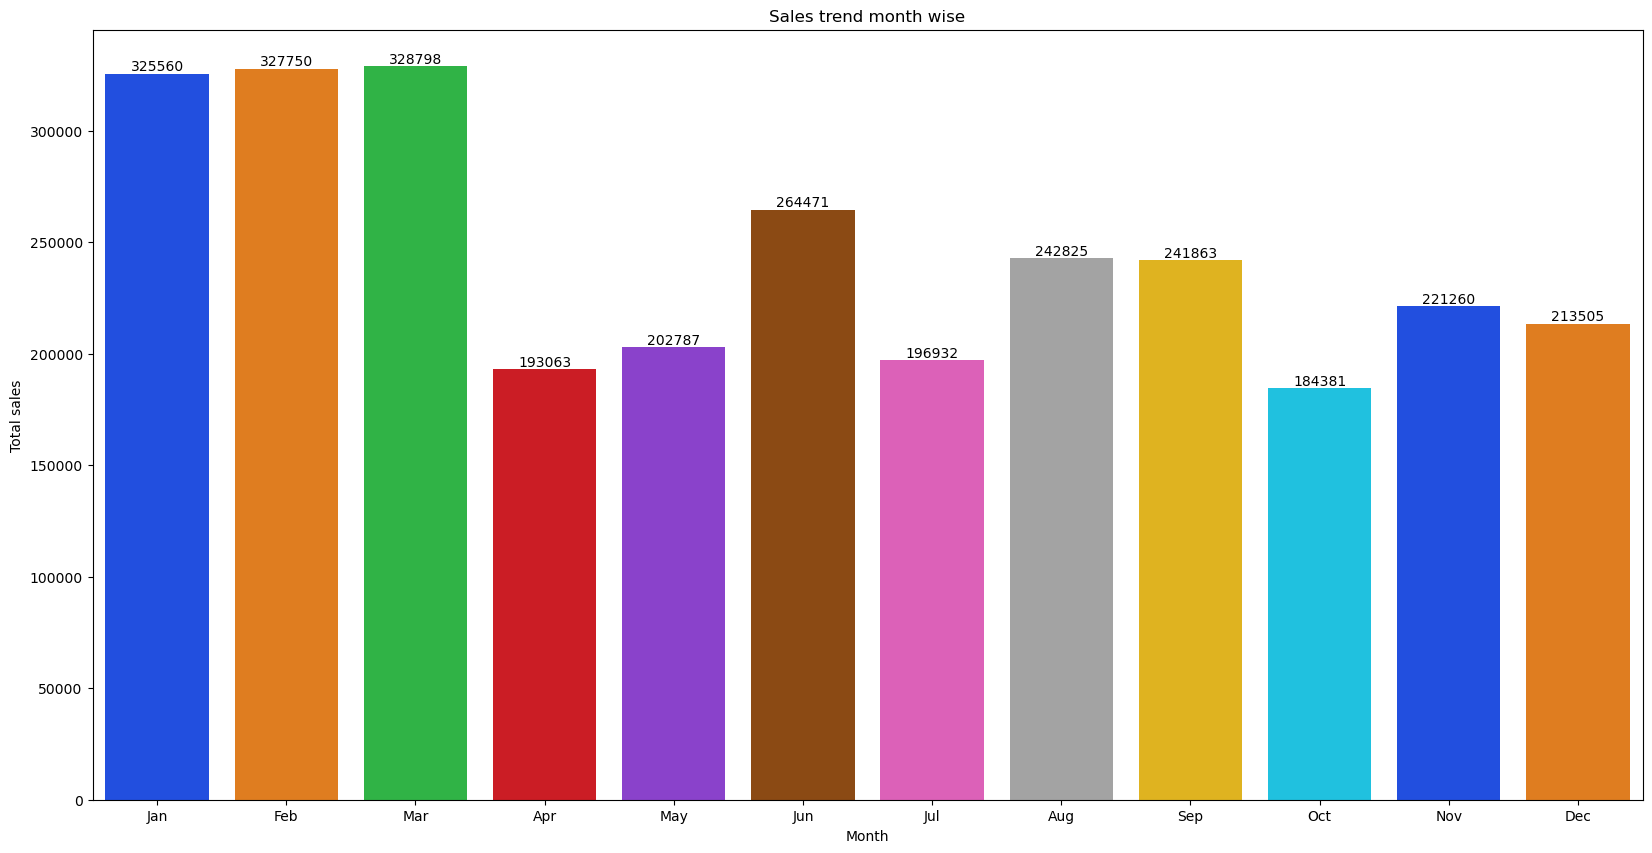

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data, y='Sales Quantity', x='Month', estimator='sum', palette='bright', errorbar=None, ax=ax)
ax.bar_label(ax.containers[0])
plt.title('Sales trend month wise')
plt.ylabel('Total sales')
plt.xlabel('Month')
plt.show()

We have most sells in march and october have lowest sells

# Sales trend year wise

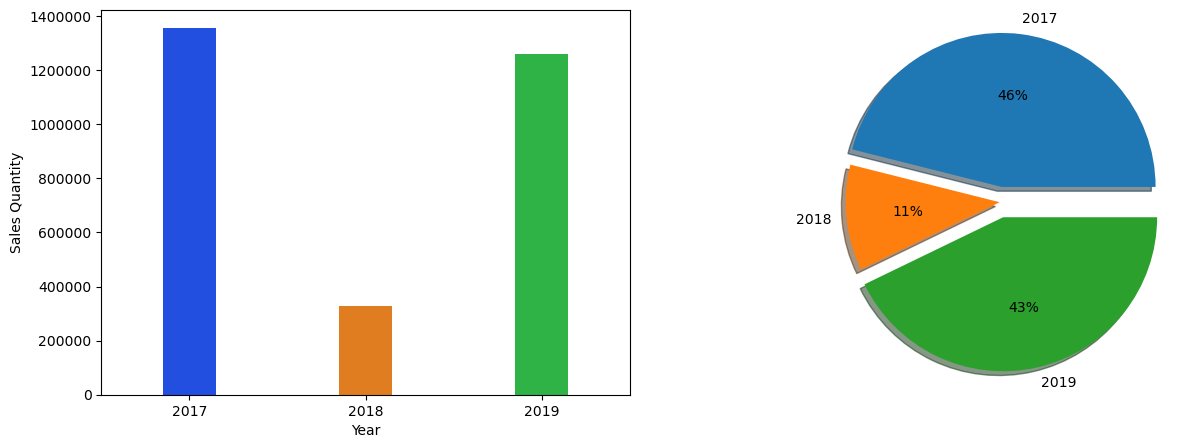

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(data=data, y='Sales Quantity', x='Year', estimator='sum', palette='bright', errorbar=None, width=0.3)
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(122)
plt.pie(
    data.groupby('Year')['Sales Quantity'].sum(), 
    shadow=True, autopct='%1.0f%%', labels=['2017', '2018', '2019'], explode=[0.1, 0, 0.1]
)
plt.show()

Maximum product selled at 2017

# Sales trend Yearly-month wise

In [23]:
yearly_monthwise = pd.DataFrame(data.groupby(['Year', 'Month'], sort=False)['Sales Quantity'].sum()).reset_index()
seventeen = yearly_monthwise[yearly_monthwise['Year']==2017]
eighteen = yearly_monthwise[yearly_monthwise['Year']==2018]
nineteen = yearly_monthwise[yearly_monthwise['Year']==2019]

### Yearly-Month wise totals

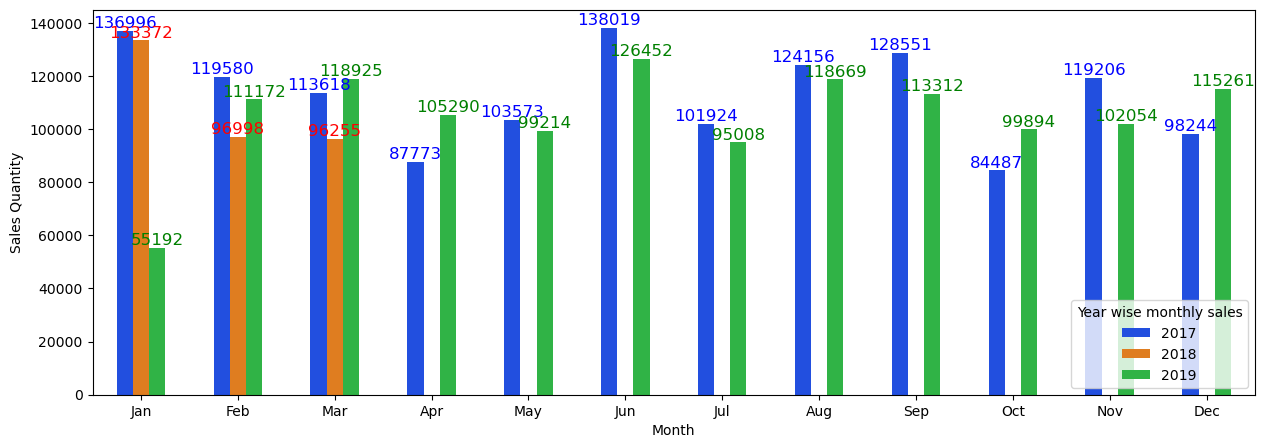

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=yearly_monthwise, x='Month', y='Sales Quantity', hue='Year', ax=ax, palette='bright', width=0.5)
ax.bar_label(ax.containers[0], color='blue', size=12)
ax.bar_label(ax.containers[1], color='red', size=12)
ax.bar_label(ax.containers[2], color='green', size=12)
plt.legend(title='Year wise monthly sales', loc='lower right')
plt.show()

### Separate Yearly-Month wise totals

### 2017

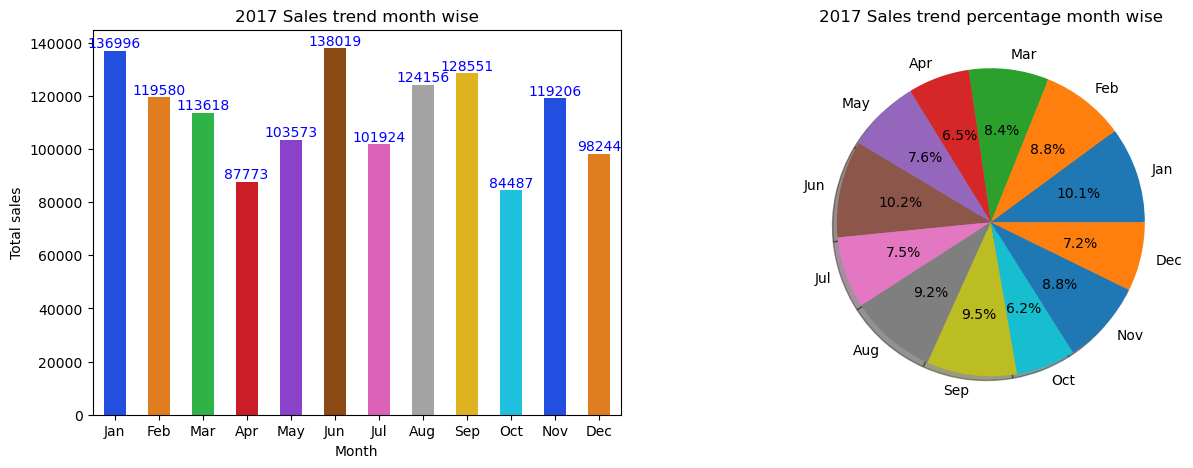

In [25]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.barplot(data=seventeen, y='Sales Quantity', x='Month', estimator='sum', palette='bright', errorbar=None, ax=ax[0], width=0.5)
for i in ax[0].containers:
    ax[0].bar_label(i, color='blue', size=10)
plt.title('2017 Sales trend month wise')
plt.ylabel('Total sales')
plt.xlabel('Month')
plt.subplot(122)
plt.title('2017 Sales trend percentage month wise')
plt.pie(seventeen['Sales Quantity'], labels=seventeen['Month'], autopct='%1.1f%%', shadow=True)
plt.show()

In 2017 we have maximum sales in june

### 2018

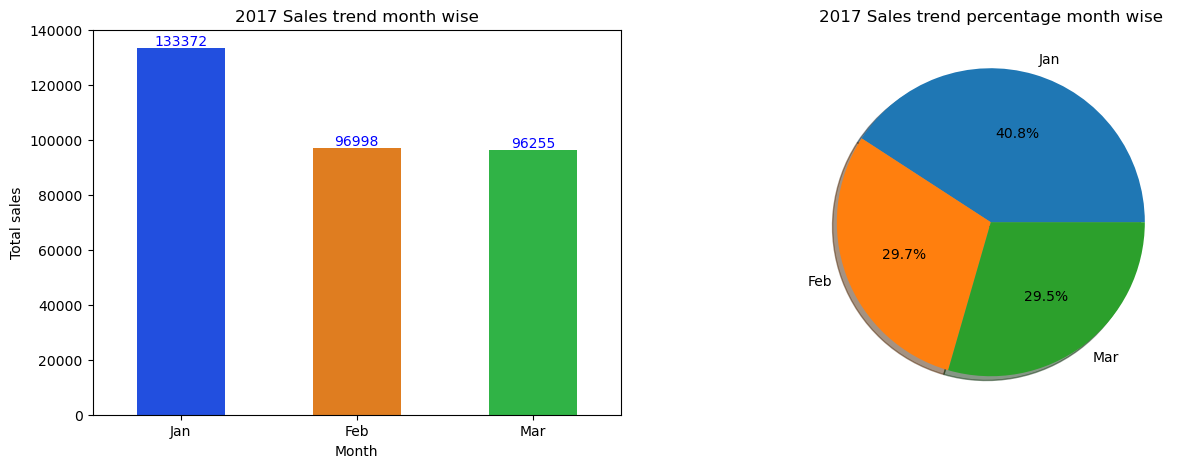

In [26]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.barplot(data=eighteen, y='Sales Quantity', x='Month', estimator='sum', palette='bright', errorbar=None, ax=ax[0], width=0.5)
for i in ax[0].containers:
    ax[0].bar_label(i, color='blue', size=10)
plt.title('2017 Sales trend month wise')
plt.ylabel('Total sales')
plt.xlabel('Month')
plt.subplot(122)
plt.title('2017 Sales trend percentage month wise')
plt.pie(eighteen['Sales Quantity'], labels=eighteen['Month'], autopct='%1.1f%%', shadow=True)
plt.show()

In 2018 we have maximum sales in january

### 2019

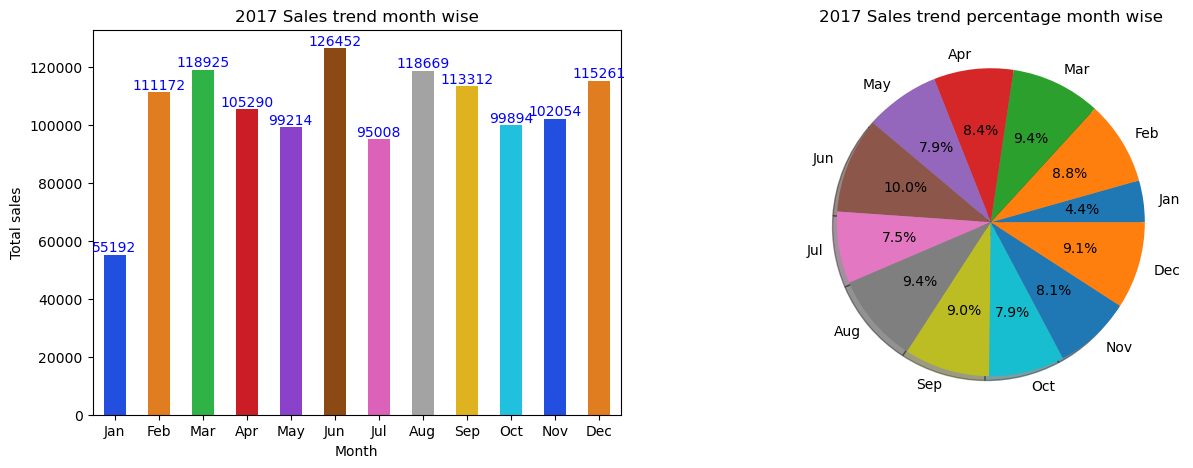

In [27]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.barplot(data=nineteen, y='Sales Quantity', x='Month', estimator='sum', palette='bright', errorbar=None, ax=ax[0], width=0.5)
for i in ax[0].containers:
    ax[0].bar_label(i, color='blue', size=10)
plt.title('2017 Sales trend month wise')
plt.ylabel('Total sales')
plt.xlabel('Month')
plt.subplot(122)
plt.title('2017 Sales trend percentage month wise')
plt.pie(nineteen['Sales Quantity'], labels=nineteen['Month'], autopct='%1.1f%%', shadow=True)
plt.show()

In 2019 we have maximum sales in june

### Word Cloud

In [28]:
from wordcloud import WordCloud, STOPWORDS

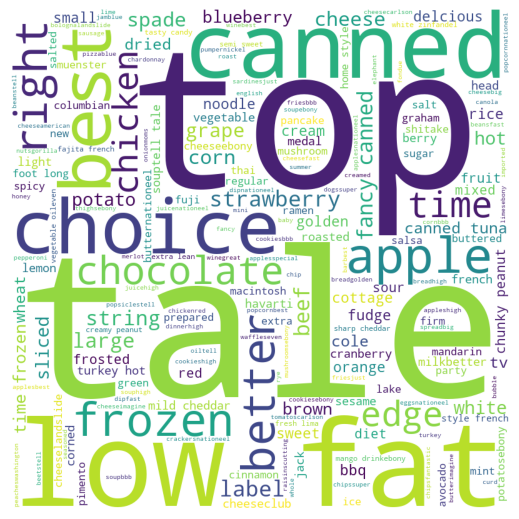

In [29]:
stopwords = STOPWORDS
words = ''
for i in data['Item'].unique():
    word = str(i).casefold()
    words += word

wordcloud = WordCloud(
    width = 800, height = 800,
    background_color ='white',
    stopwords = stopwords,
    min_font_size = 10
).generate(words)

plt.figure(figsize=(20, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [30]:
#generating a detail report of columns
from ydata_profiling import ProfileReport
ProfileReport(data).to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]